In [1]:
# -*- coding: utf-8 -*-
"""
Created on 2025.03.03

@author: Yaqiu Zhang
"""
import time
from get_data import get_data
from random_samples import random_samples_and_remaining
from ESGP import ESGP
from RMRF import RMRF
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import numpy as np
def get_samples(choose_name, train_size, random_nu):
    if choose_name == 'every_num':
        x_train, y_train, x_ind, x_test, y_test, y_ind, random_indices_log = random_samples_and_remaining(img, img_gt_lab, img_gt_ind, num_samples=175)
    elif choose_name == 'every_per':
        x_train, x_test, y_train, y_test, x_ind, y_ind = train_test_split(img, img_gt[1, :], img_gt[0, :], train_size=train_size,stratify=img_gt[1, :],random_state=random_nu,)  # random_state=50,
    return x_train, x_test, y_train, y_test, x_ind, y_ind
img_w, img_h, img_b, img, img_gt, all_img ,img_gt_ind, img_gt_lab,num_class = get_data(dataset_name='whu_hh')
[gpq,qq,qq_kappa,iterables,per_class,img_plot ,timee] = [[] for _ in range(7)]
random_state1 = [202501,202502,202303,202504,202505,202506,202507,202508,202509,202510]
for w in tqdm(range(len(random_state1))):
    t_start = time.time()
    x_train, x_test, y_train, y_test, x_ind, y_ind = get_samples(choose_name='every_per', train_size=0.01, random_nu=random_state1[w])
    result_matrix1,oa,precision_per_class1 =ESGP(x_train,y_train,all_img,img_gt_lab,img_gt_ind,x_ind,num_class)
    gdmrf_result,look_plt,kappa_score2,j,precision_per_class,img_plot1 = RMRF(result_matrix1,x_ind,y_ind,y_test, y_train,num_class,img_w,img_h,img_gt_ind, img_gt_lab,img_gt)
    qq.append(max(gdmrf_result))
    qq_kappa.append(kappa_score2)
    gpq.append(oa*100)
    iterables.append(j)
    per_class.append(precision_per_class)
    img_plot.append(img_plot1)
    timee.append(time.time()- t_start)

array_per_class = np.array(per_class)
per_class_means = [np.mean(item) for item in per_class]
print(f"per_class")
per_class_mean = np.mean(array_per_class, axis=0)
per_class_std = np.std(array_per_class, axis=0)
for i, (mean_value, std_value) in enumerate(zip(per_class_mean, per_class_std)):
    print("c{:d}. {:.2f}\u00B1{:.2f}".format(i+1, mean_value, std_value))
print(f"\nOA：{np.mean(qq):.2f}\u00B1{np.std(qq):.2f}")
print(f"AA：{np.mean(per_class_means):.2f}\u00B1{np.std(per_class_means):.2f}")
print(f"kappa：{np.mean(qq_kappa) * 100:.2f}\u00B1{np.std(qq_kappa) * 100:.2f}")
print(f"time：{np.mean(timee):.2f}\u00B1{np.std(timee):.2f}")
print(f"iterables：{np.mean(iterables):.2f}\u00B1{np.std(iterables):.2f}")

 40%|█████████████████████████████████▏                                                 | 4/10 [00:30<00:44,  7.46s/it]

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:37<00:37,  7.45s/it]

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.44s/it]

per_class
c1. 97.65±0.91
c2. 72.65±2.58
c3. 94.66±0.65
c4. 99.75±0.08
c5. 98.86±0.83
c6. 98.60±0.34
c7. 95.77±0.48
c8. 98.73±1.26
c9. 96.08±1.05
c10. 95.84±1.21
c11. 93.21±1.77
c12. 94.38±1.70
c13. 96.12±0.73
c14. 92.87±1.63
c15. 80.41±6.61
c16. 96.01±0.79
c17. 94.22±1.84
c18. 88.63±3.23
c19. 90.85±1.34
c20. 95.01±2.38
c21. 95.03±3.46
c22. 98.16±0.77

OA：97.35±0.12
AA：93.80±0.36
kappa：96.65±0.15
time：7.44±0.14
iterables：0.00±0.00


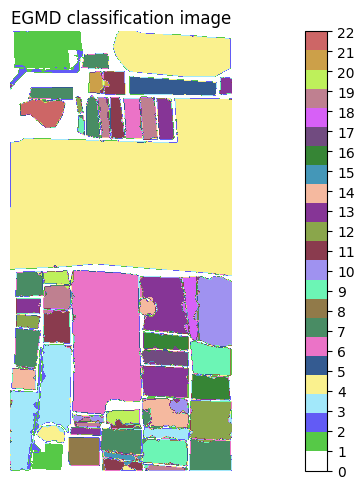

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
colors = [
        '#FFFFFF', '#56c947', '#625bf5', '#a2e8fa', '#faf18e', 
        '#345b91', '#eb73c7', '#498c64', '#917a49', '#6cf5b5', 
        '#9f92f0', '#8a3b4e', '#8aa64b', '#863596', '#f5b99f', 
        '#4497b8', '#368535', '#714b80', '#d760f7', '#bf8090', 
        '#bef05b', '#cca049', '#cd6666']
cmap = ListedColormap(colors)
plt.figure(figsize=(15, 5))

plt.imshow(img_plot1, cmap=cmap)
plt.title('EGMD classification image')
plt.axis('off')
plt.colorbar(ticks=range(len(colors)),)
plt.tight_layout()
plt.show()
